In [1]:
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import numpy as np






#for when whole table needs reviewing

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
data = pd.read_csv("/Users/harry/Dropbox (Sandtable)/Root/Harry Workspace/Emerging Markets Census Data/CZ,PO,SL,HU Data/Final Datasets/HU_data.csv",
                   usecols =[3,4,5], skiprows =[3159,3158,3157,3156, 3155])

pd.options.display.max_rows = 4


print "Input Data - To be fiddled with"
print "number of LAU2 divisions: 3153"
data = data.drop(data.index[3154])
data

Input Data - To be fiddled with
number of LAU2 divisions: 3153


,Total Population,LAU2 Area,Degree of Urbanisation (1: City /// 2: Towns & Suburbs /// 3: Rural Areas
0,1740041.0,525090000.0,1.0
1,1932.0,17740000.0,3.0
...,...,...,...
3152,170052.0,281000000.0,1.0
3153,5251.0,75770000.0,3.0


In [2]:
# create appropriate lists (remove description & Capital city data)

pop = data['Total Population'].tolist()
area = data['LAU2 Area'].tolist()
urb = data['Degree of Urbanisation \r(1: City /// 2: Towns & Suburbs \r/// 3: Rural Areas'].tolist()
pop = (np.nan_to_num(pop)).tolist()
area = (np.nan_to_num(area)).tolist()
urb = (np.nan_to_num(urb)).tolist()
list = [pop,area,urb]
for i in list:
    i.remove(i[0])
    
    
pop = [int(i) for i in pop]
area = [int(i) for i in area]
urb = [int(i) for i in urb]


#standard deviation calc

def find_sd(a):

    sum_ = sum(a)
    Expx=sum_/float(len(a))

    sq_dist = []
    for i in a:
        sq_dist.append((i-Expx)**2)
    b = sum(sq_dist)
    var = b/len(a)
    
    s_d = math.sqrt(var)
    return s_d


#make new pandas dataframe

#standard deviation
sd_list1=[]
sd_list1.append(find_sd(pop))
sd_list1.append(find_sd(area))
sd_list1.append((find_sd(urb)))
sd_list=[]
sd_list.append(format(int(sd_list1[0]),',d'))
sd_list.append(format(int(sd_list1[1]),',d'))
sd_list.append(sd_list1[2])

#maximum 
max_list1=[]
max_list1.append(max(pop))
max_list1.append(max(area))
max_list1.append(max(urb))
max_list=[]
for i in max_list1:
    max_list.append(format(i,',d'))

#minimum
min_list1=[]
min_list1.append(min(pop))
def get_rid_zeros(a):
    for i in a:
        if i == 0:
            a.remove(i)
get_rid_zeros(area)
min_list1.append(min(area))
min_list1.append(min(urb))
min_list=[]
for i in min_list1:
    min_list.append(format(i,',d'))

#mean
def get_mean(a):
    return sum(a)/float(len(a))
mean =[]
mean.append(format(int(get_mean(pop)),',d'))
mean.append(format(int(get_mean(area)),',d'))
mean.append(get_mean(urb))


#make new dataframe with basic statistics

basic_stats1 = pd.DataFrame({
 'minimum' : min_list,
 'maximum':max_list,'standard deviation' : sd_list,'mean': mean
  })
parameter=['LAU-2 population', 'LAU-2 area', 'LAU-2 urbanisation']
basic_stats = basic_stats1.set_index([parameter])
columnsTitles = ['mean', 'minimum', 'maximum','standard deviation']
basicstats = basic_stats.reindex(columns=columnsTitles)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
basic_stats.round(2)

print "Hungary LAU-2 Basic Statistics (Excluding Budapest)                note: urbanisation --> 1 is city, 3 is rural"
basicstats

Hungary LAU-2 Basic Statistics (Excluding Budapest)                note: urbanisation --> 1 is city, 3 is rural


,mean,minimum,maximum,standard deviation
LAU-2 population,"2,606",9,"207,594","9,267"
LAU-2 area,"29,336,685","560,000","487,980,000","35,689,449"
LAU-2 urbanisation,2.913,1,3,0.292


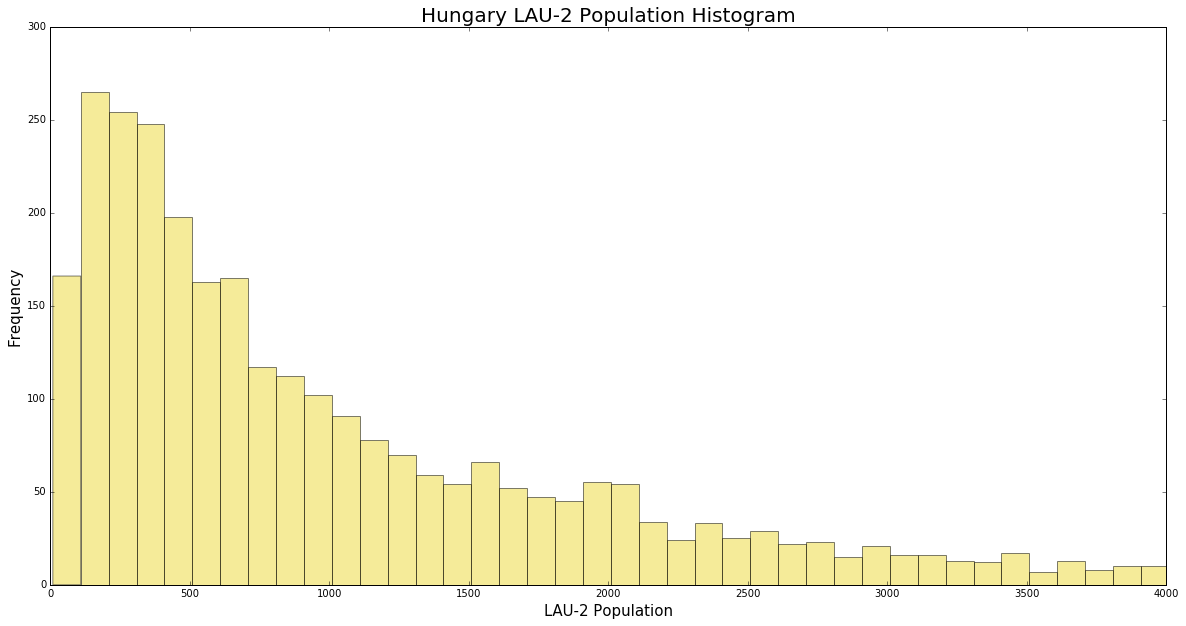

In [5]:
#make histogram of population 

hist_pop=data['Total Population']

hist_pop = [int(x) for x in hist_pop]
bins = np.arange(min(hist_pop), max(hist_pop), 100)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(hist_pop, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834')
plt.axis([0,4000,0,300])
plt.title("Hungary LAU-2 Population Histogram", fontsize = 20)
plt.xlabel("LAU-2 Population", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.plot();

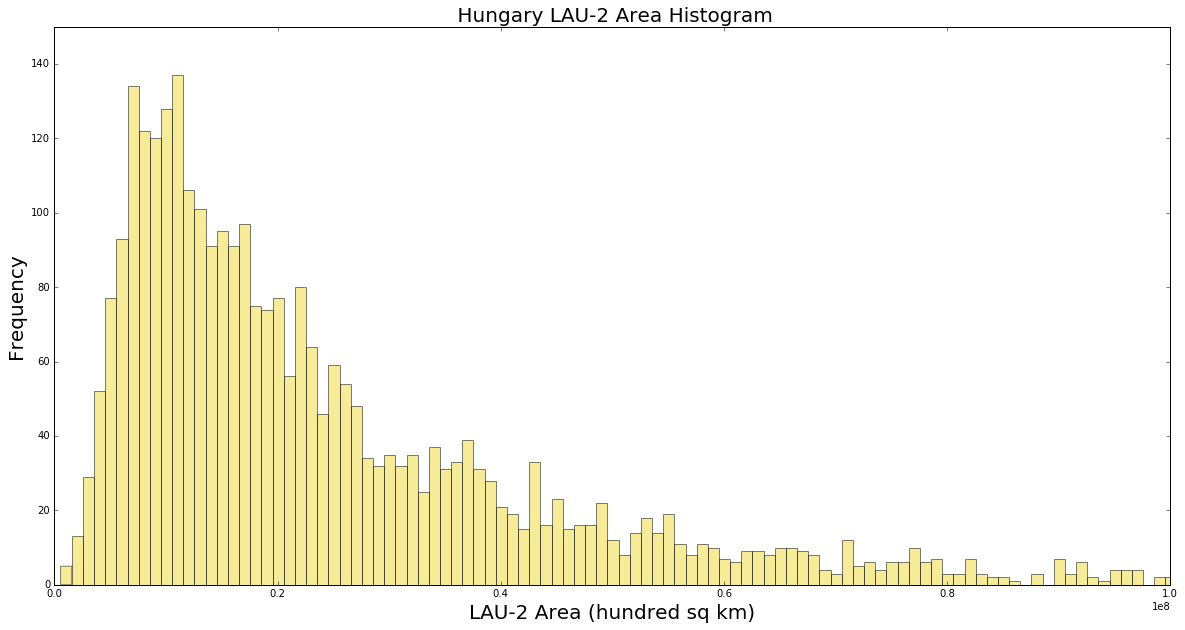

In [6]:
#make histogram of area

hist_area=data['LAU2 Area']

hist_area = [int(x) for x in hist_area]
bins = np.arange(min(hist_area), max(hist_area), 1000000)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(hist_area, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834')
plt.axis([0,100000000,0,150])
plt.title(" Hungary LAU-2 Area Histogram", fontsize = 20)
plt.xlabel("LAU-2 Area (hundred sq km)",fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.plot();

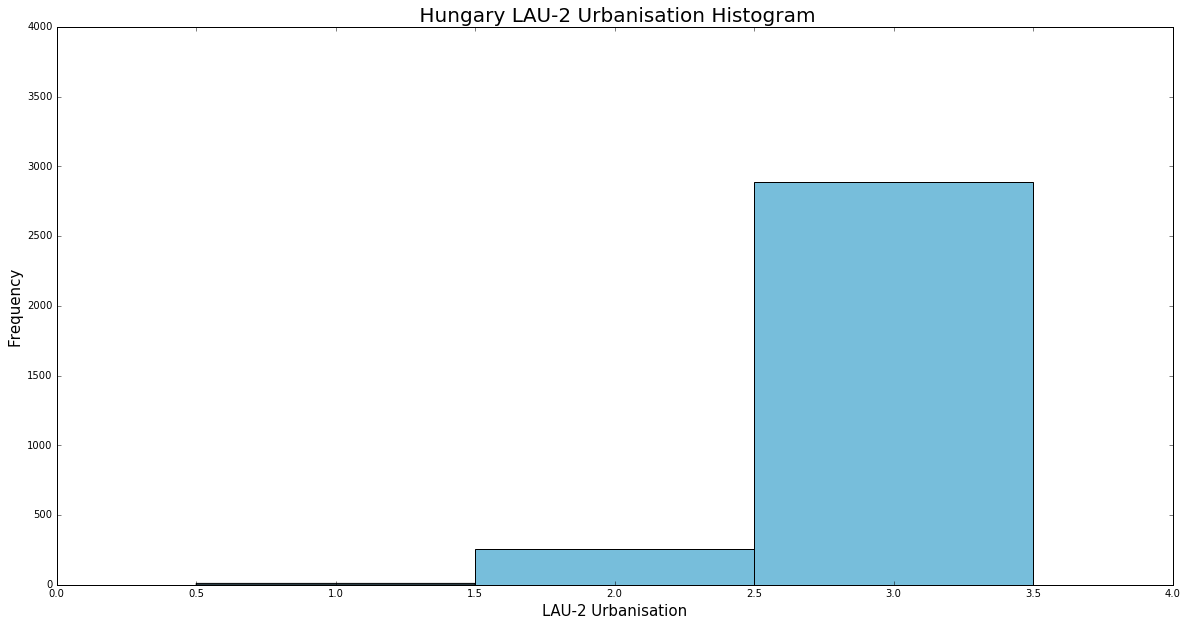

In [7]:
#make histogram of urbanisation

hist_urb=data['Degree of Urbanisation \r(1: City /// 2: Towns & Suburbs \r/// 3: Rural Areas']

hist_urb = [int(x) for x in hist_urb]
bins = np.arange(0.5, 4.5, 1)

%matplotlib inline
plt.figure(figsize=(20,10))


plt.hist(hist_urb, 
         bins=bins, 
         alpha=1, 
         color='#77BEDB')
plt.axis([0,4,0,4000])
plt.title(" Hungary LAU-2 Urbanisation Histogram", fontsize=20)
plt.xlabel("LAU-2 Urbanisation", fontsize=15)
plt.ylabel("Frequency" , fontsize = 15)


plt.plot();

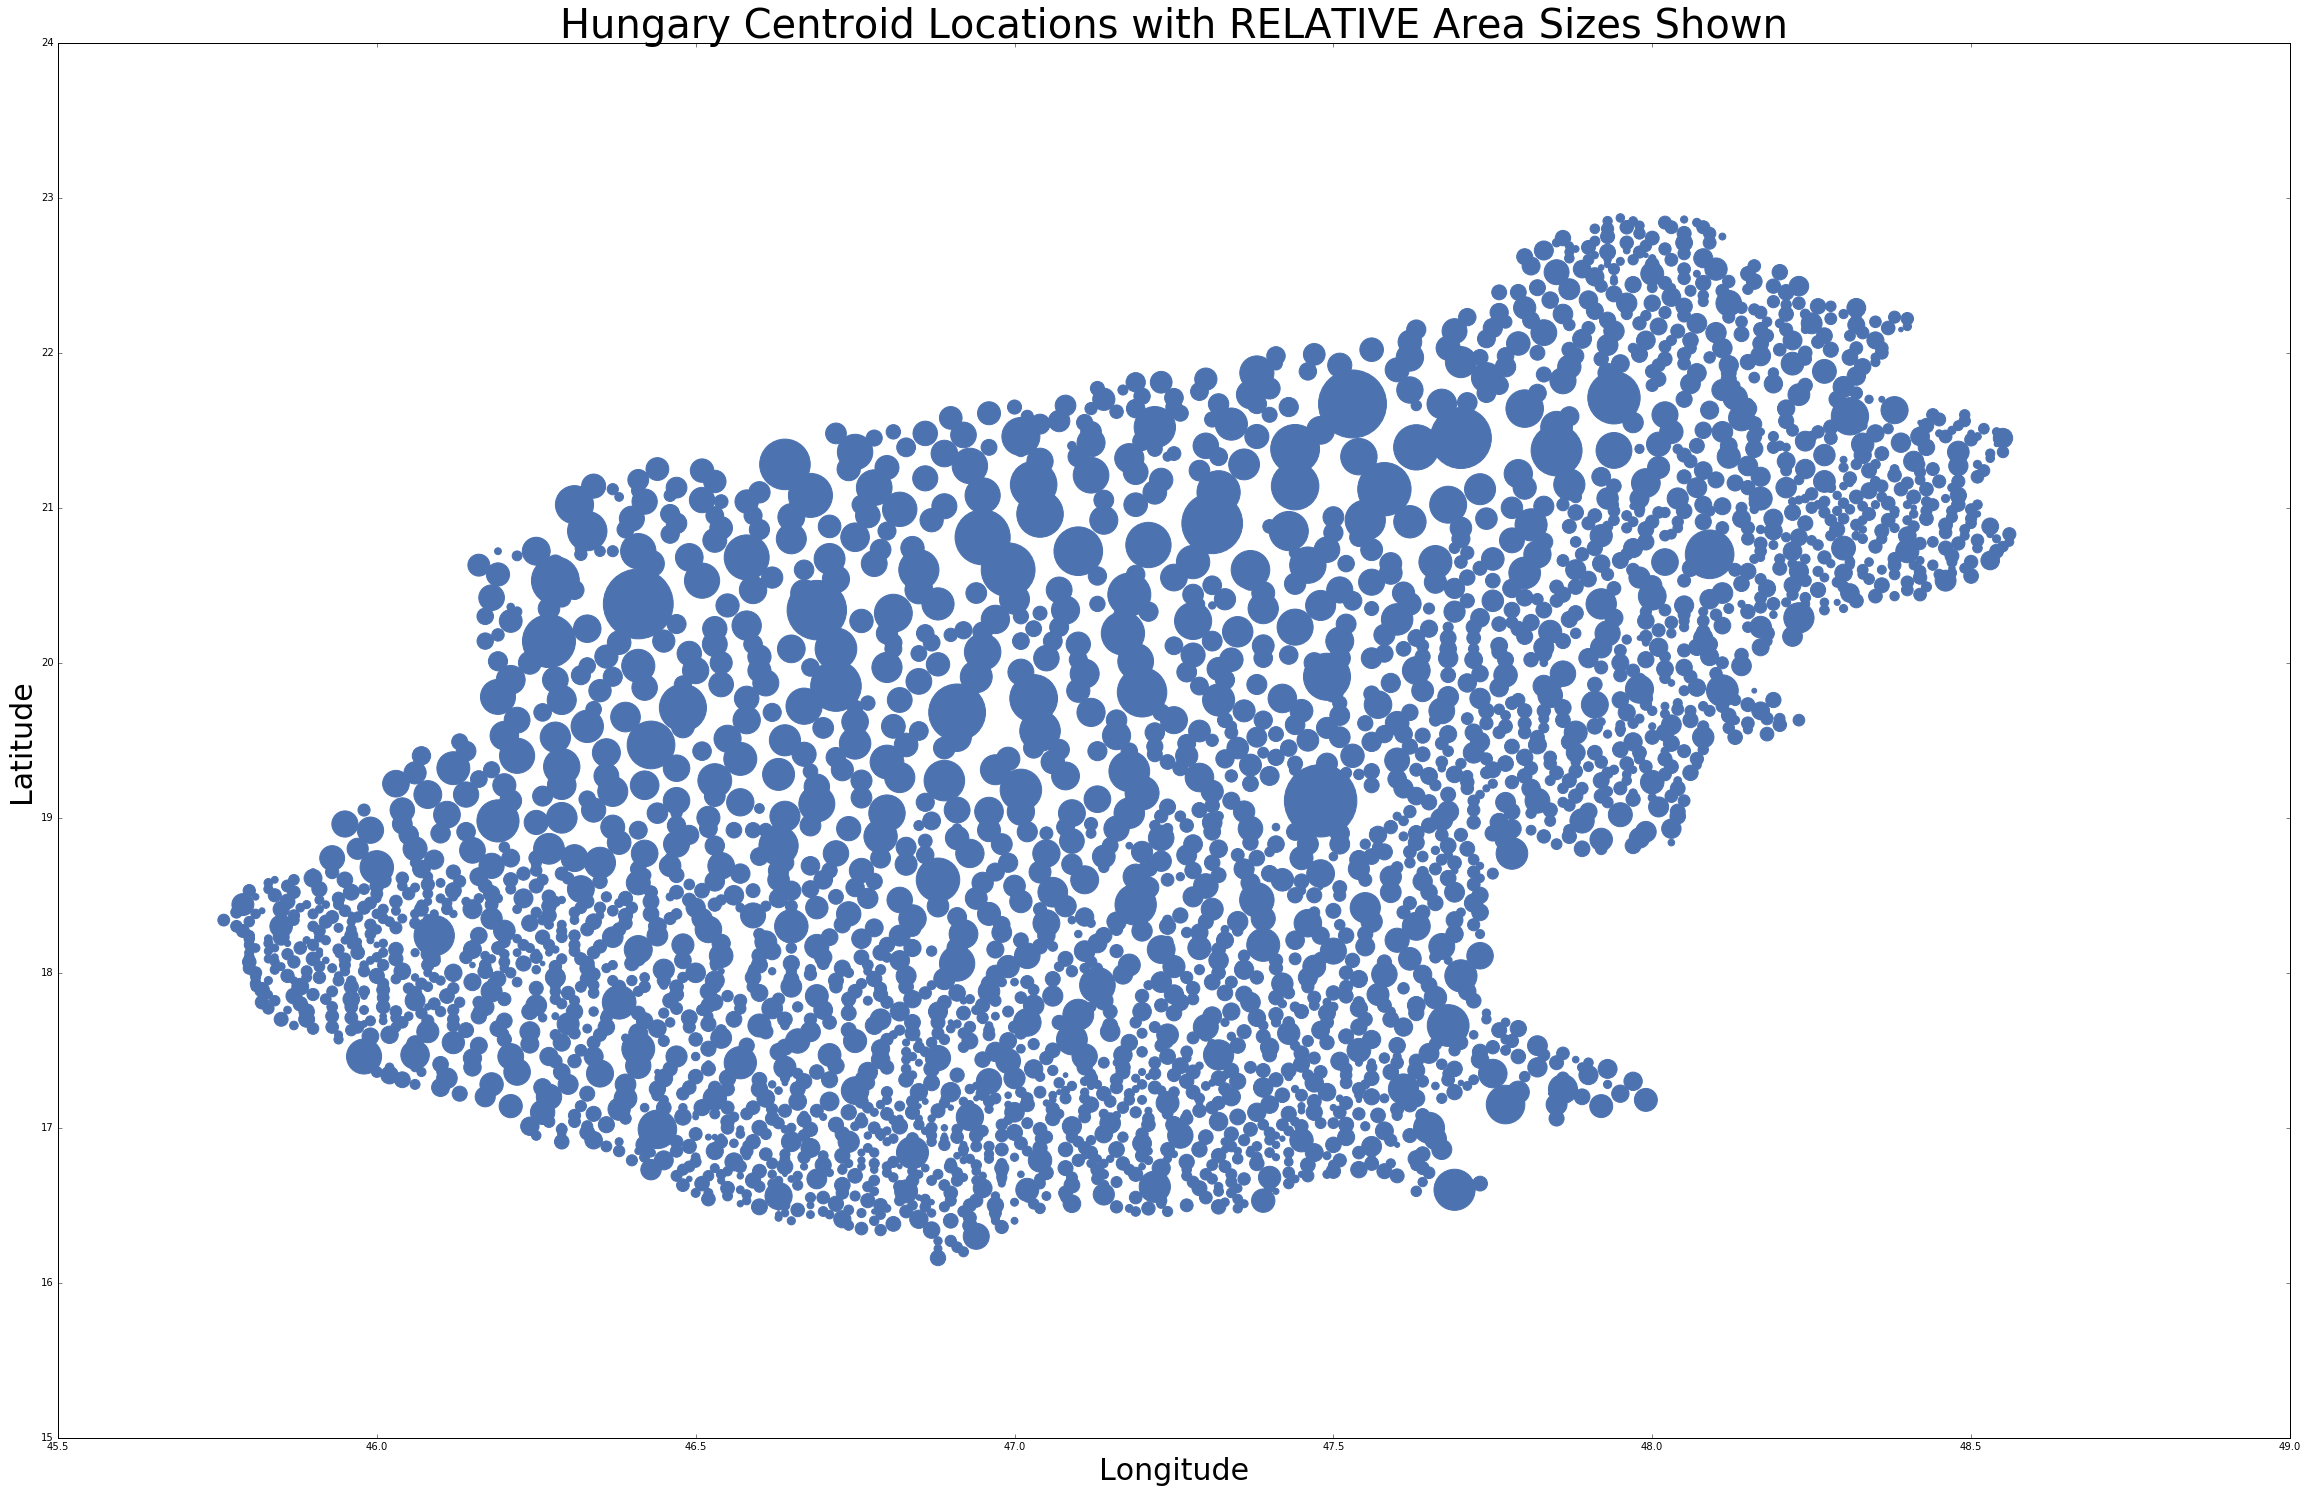

In [48]:
#Gather neccessary data for 'map' visualisation
%matplotlib inline
cols=[]
cols.append(4)
cols.append(3)
cols.append(24)
cols.append(25)
data2 = pd.read_csv("/Users/harry/Dropbox (Sandtable)/Root/Harry Workspace/Emerging Markets Census Data/CZ,PO,SL,HU Data/Final Datasets/HU_data.csv", header = None,usecols=cols)

#pull out lists, remove non numbers

area = data2[4].tolist()
latitude = data2[24].tolist()
longitude = data2[25].tolist()
area.remove(area[0])
latitude.remove(latitude[0])
longitude.remove(longitude[0])

#random area scaling - only need relative ideas

area_scaled = [float(i)/100000 for i in area]

#plot

plt.figure(figsize=(40,25))
plt.scatter(x = longitude, y = latitude, s= area_scaled, color='#4C72B0')
plt.title("Hungary Centroid Locations with RELATIVE Area Sizes Shown", fontsize=40)
plt.xlabel("Longitude", fontsize=30)
plt.ylabel("Latitude" , fontsize = 30)

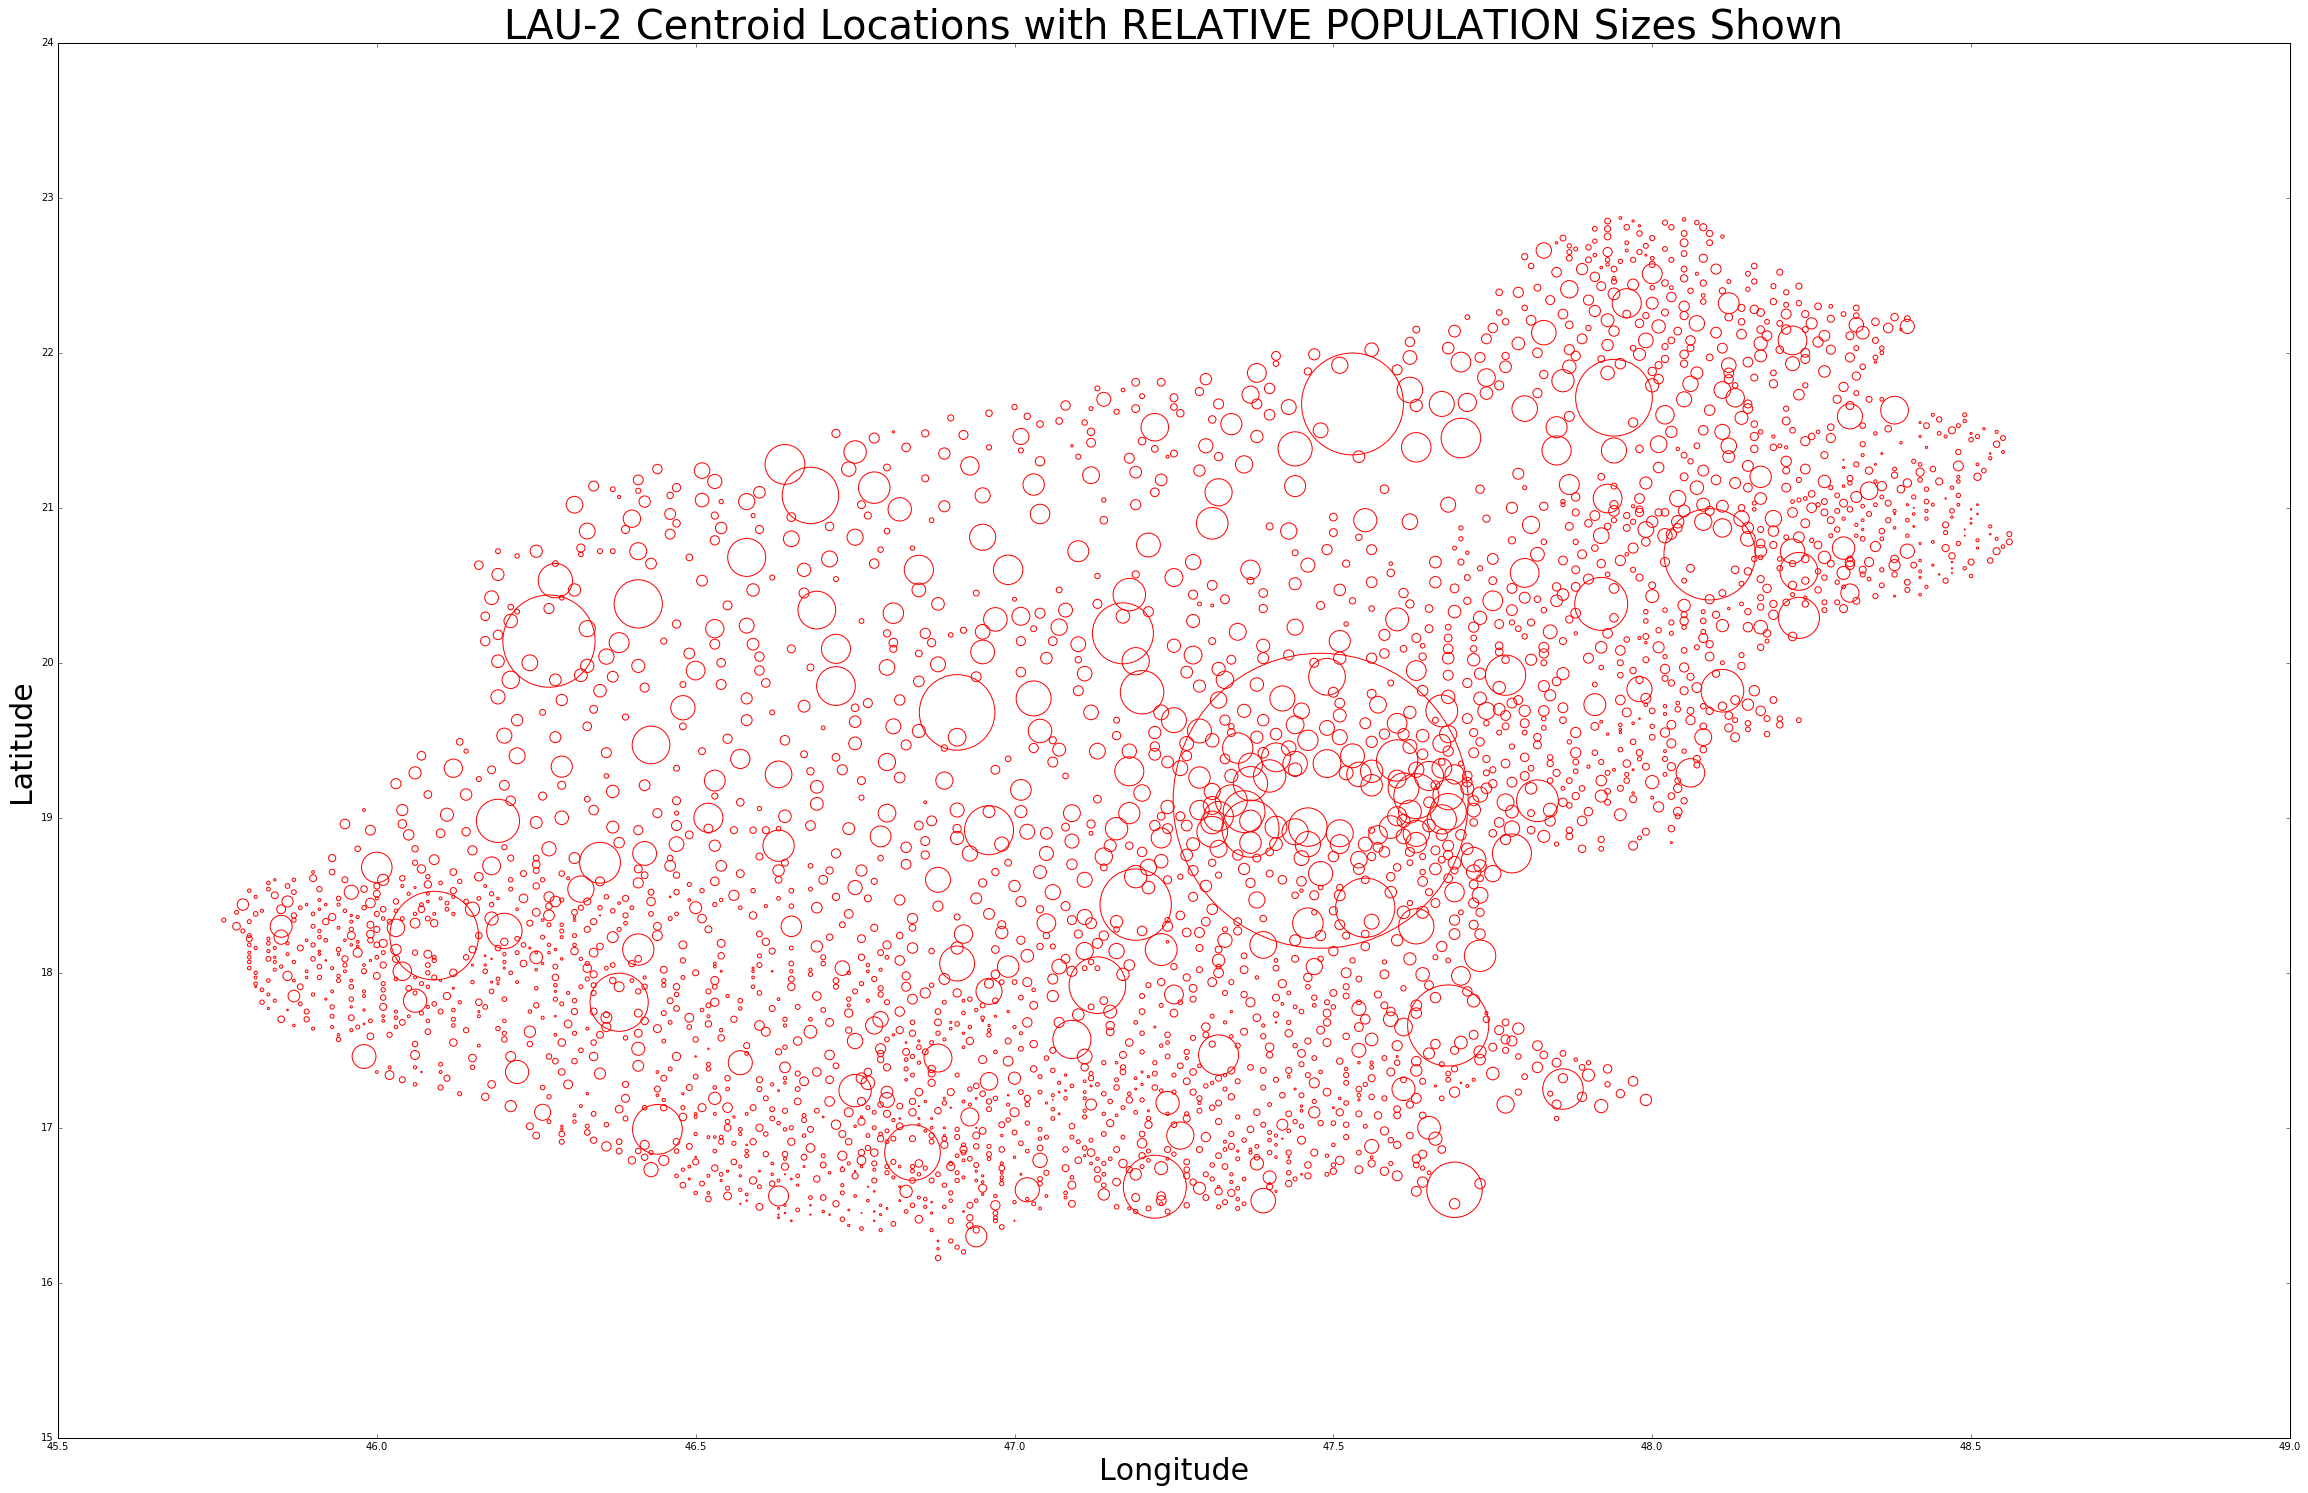

In [51]:
#pull out lists, remove non numbers

pop = data2[3].tolist()

pop.remove(pop[0])


#random area scaling - only need relative ideas

pop_scaled = [float(i)/20 for i in pop]

#plot
%matplotlib inline
plt.figure(figsize=(40,25))
plt.scatter(x = longitude, y = latitude, s= pop_scaled,facecolors='none', edgecolors='r')
plt.title("LAU-2 Centroid Locations with RELATIVE POPULATION Sizes Shown", fontsize=40)
plt.xlabel("Longitude", fontsize=30)
plt.ylabel("Latitude" , fontsize = 30)

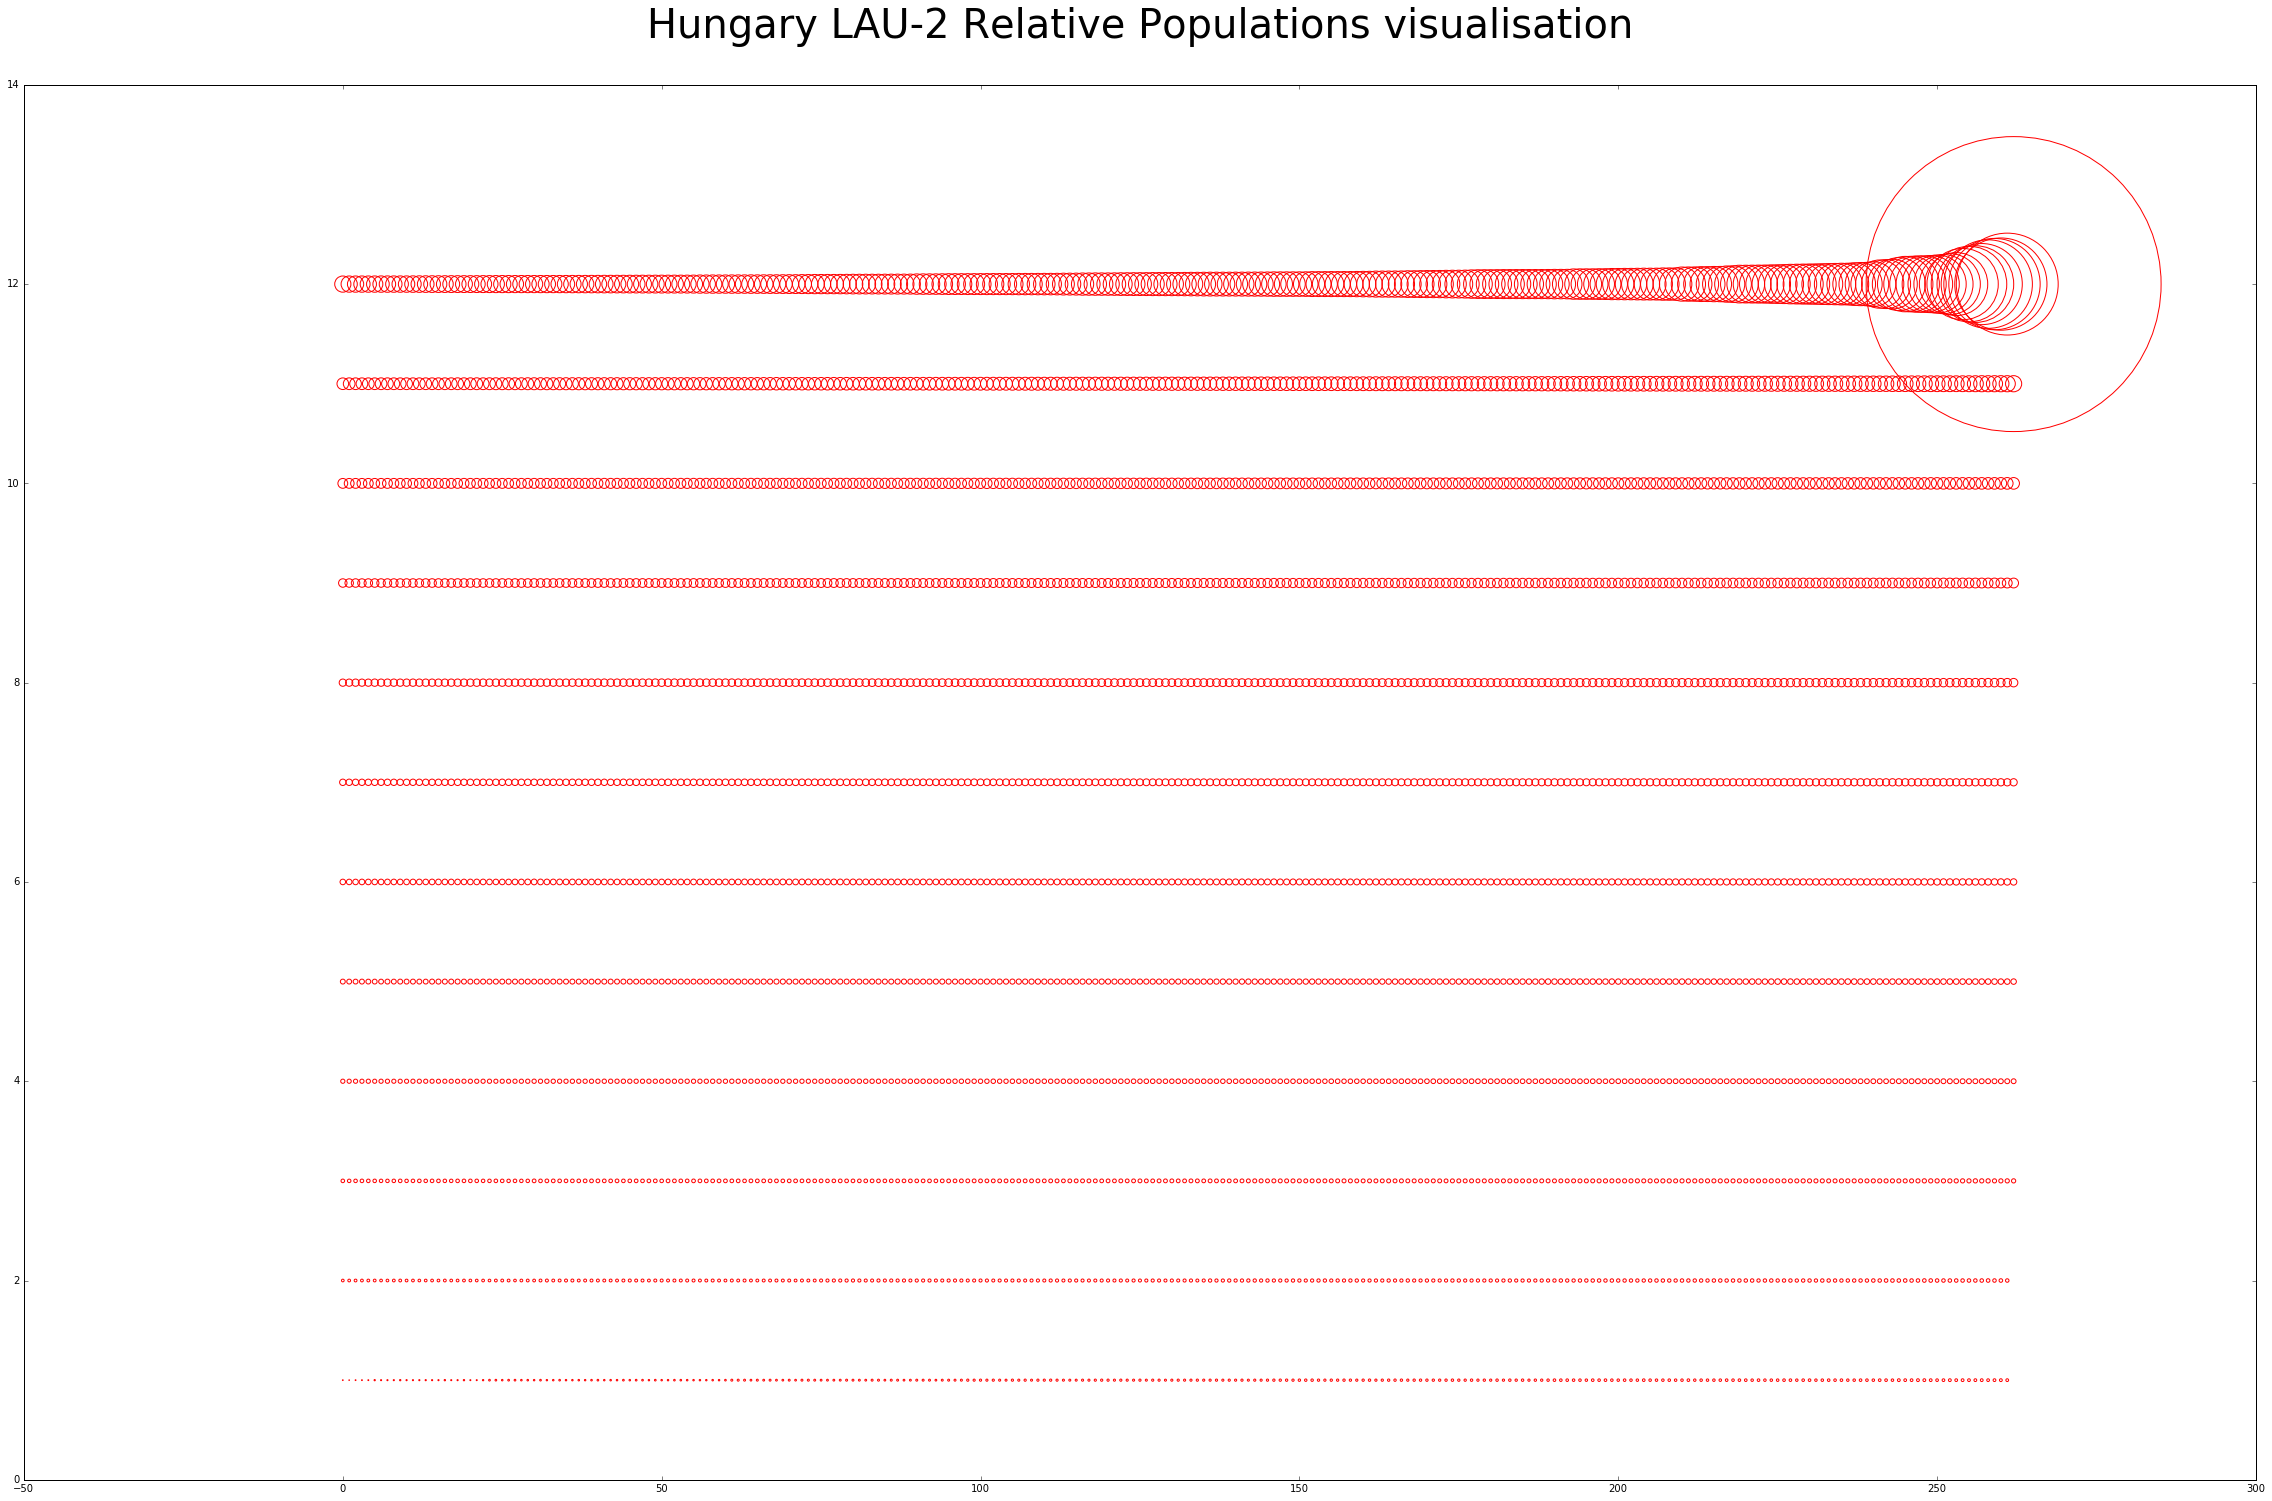

In [52]:
pop_scaled.remove(pop_scaled[3159])
pop_scaled.remove(pop_scaled[3158])
pop_scaled.remove(pop_scaled[3157])
pop_scaled.remove(pop_scaled[3156])
pop_scaled.remove(pop_scaled[3155])
pop_scaled.remove(pop_scaled[3154])

y=[]
for i in [1]*262:
    y.append(i)
for i in [2]*262:
    y.append(i)
for i in [3]*263:
    y.append(i)
for i in [4]*263:
    y.append(i)
for i in [5]*263:
    y.append(i)
for i in [6]*263:
    y.append(i)
for i in [7]*263:
    y.append(i)
for i in [8]*263:
    y.append(i)
for i in [9]*263:
    y.append(i)
for i in [10]*263:
    y.append(i)
for i in [11]*263:
    y.append(i)
for i in [12]*263:
    y.append(i)

    
x=[]
x1=[]
for i in range(0,262):
    x1.append(i)
for i in range(0,2):
    for j in x1:
        x.append(j)
x2=[]
for i in range(0,263):
    x2.append(i)
for i in range(0,10):
    for j in x2:
        x.append(j)


pop_scaled = sorted(pop_scaled, key=int)
%matplotlib inline

    
plt.figure(figsize=(40,25))
plt.scatter(x = x, y = y, s= pop_scaled,facecolors='none', edgecolors='r')
plt.title("Hungary LAU-2 Relative Populations visualisation", fontsize=40,position=(0.5, 1.03))